In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\91790\Downloads\Insaid Internship test\Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.shape

(6362620, 11)

##### Cheking For Null Values

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

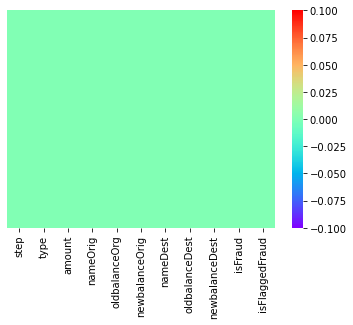

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [9]:
df.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
306   CASH_OUT  220427.13   C1029846599  0.00           0.00            C129321077   882543.64       1102970.77      0        0                 1
                221047.89   C644407995   13756.00       0.00            C1396283314  9082.00         0.00            0        0                 1
                221009.03   C74685400    102768.00      0.00            C1714223283  767644.73       988653.76       0        0                 1
                220986.46   C540058568   9141.00        0.00            C1344091292  0.00            220986.46       0        0                 1
                                                                                                                                 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


##### Summary of Stats


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### The isFraud variable is read as an integer. Since this is the class variable, we convert it object type.

In [12]:
df['isFraud']=df['isFraud'].astype('object')

In [13]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

#### The most frequent transaction types are CASH_OUT and PAYMENT. 
#### From the above possible types of transactions, only cash-out and transfer are considered as fraudulent transactions.

#### Since only CASH_OUT and TRANSFER can be fraudulent so it makes sense to retain only these two types of transactions in the dataset

### Removing PAYMENT CASH_IN and DEBIT from dataset

In [14]:
df=df.loc[df['type'].isin(['CASH_OUT','TRANSFER']),:]

In [15]:
df.shape

(2770409, 11)

#### Checking where the amount is negative or zero

In [16]:
sum(df['amount']<0)

0

In [17]:
sum(df['amount']==0)

16

#### Removing transactions where amount is 0

In [18]:
df=df.loc[df['amount']>0,:]

In [19]:
df.shape

(2770393, 11)

#### Now check the balance inaccuracies in sender and recepient balances.  Ideally, the recipient's final balance should be equal to the recipient's initial balance plus the transaction amount. Similarly, the originator's final balance should be equal to originator's initial balance minus the transaction amount.
#### Defining the inaccuracies in sender and receiver balances
##### Feature Engineering

In [20]:
df['origBalance_inacc']=(df['oldbalanceOrg']-df['amount'])-df['newbalanceOrig']
df['destBalance_inacc']=(df['oldbalanceDest']+df['amount'])-df['newbalanceDest']

In [21]:
df.items

<bound method DataFrame.items of          step      type      amount     nameOrig  oldbalanceOrg  \
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
15          1  CASH_OUT   229133.94   C905080434       15325.00   
19          1  TRANSFER   215310.30  C1670993182         705.00   
24          1  TRANSFER   311685.89  C1984094095       10835.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest isFraud  \
2                   0.0   C553264065            0.00            0.00       1   
3 

#### The name (or ID) of the originator and destination are not needed for classification. So, we remove them.

In [22]:
df=df.drop(['nameOrig','nameDest'],axis=1)

In [23]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0,-213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0,-214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,-300850.89,-2401220.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770393 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   oldbalanceOrg      float64
 4   newbalanceOrig     float64
 5   oldbalanceDest     float64
 6   newbalanceDest     float64
 7   isFraud            object 
 8   isFlaggedFraud     int64  
 9   origBalance_inacc  float64
 10  destBalance_inacc  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 253.6+ MB


### One Hot Encoding

In [25]:
df=pd.get_dummies(df,columns=['type'],prefix=['type'])

In [26]:
from sklearn.preprocessing import StandardScaler

#### Standardizing the data using StandardScaler()

In [27]:
std_scaler=StandardScaler()
df_scaled=pd.DataFrame(std_scaler.fit_transform(df.loc[:,~df.columns.isin(['isFraud'])]))
df_scaled.columns=df.columns[:-1]
df_scaled['isFraud']=df['isFraud']

#### Taking 30% data for testing and remaining 70% for training.

In [28]:
X=df_scaled.loc[:,df_scaled.columns!='isFraud']
Y=df_scaled.loc[:,df_scaled.columns=='isFraud']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

In [29]:
Y.isnull().sum()

isFraud    1551875
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [31]:
Y_train_=label_encoder.fit_transform(Y_train.values.ravel())
Y_test=label_encoder.fit_transform(Y_test.values.ravel())

## Using Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


###### Validating data by 5-fold cross-validation

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [34]:
skf=StratifiedKFold(5)

In [35]:
Y_train=Y_train.fillna(0)

In [36]:
sc_lr=cross_val_score(lr, X_train, Y_train.values.ravel(), cv=skf,scoring='recall')

In [37]:
lr.fit(X_train,Y_train.values.ravel())

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Got 44% accuracy

In [39]:
y_pred=lr.predict(X_test)
score=accuracy_score(y_pred,Y_test)
score

0.4391831244179527

In [40]:
cm=confusion_matrix(Y_test,y_pred,labels=lr.classes_)
cm

array([[365013,      0],
       [   694,      0]], dtype=int64)

In [41]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

In [42]:
print(recall_score(Y_test,y_pred,average="micro"))

0.4391831244179527


In [43]:
print(precision_score(Y_test,y_pred,average="micro"))

0.4391831244179527


In [44]:
print(f1_score(Y_test,y_pred,average="micro"))

0.4391831244179527


In [45]:
print(classification_report(Y_test,y_pred))

C:\Users\91790\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      1.00      0.61    365013
           1       0.00      0.00      0.00       694
           2       0.00      0.00      0.00    465411

    accuracy                           0.44    831118
   macro avg       0.15      0.33      0.20    831118
weighted avg       0.19      0.44      0.27    831118



C:\Users\91790\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91790\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
